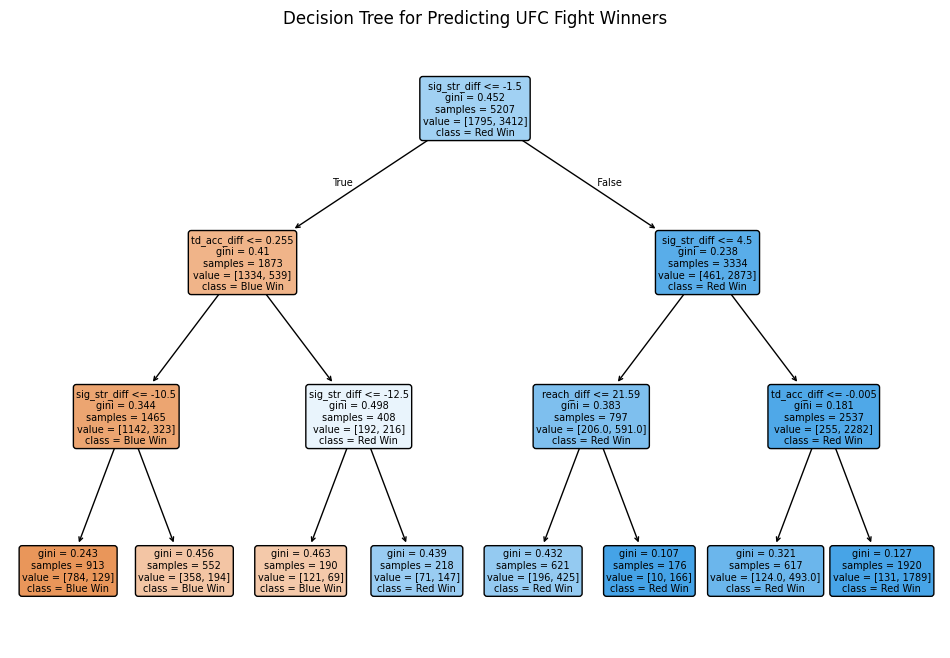

In [81]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocess the data
ufc_data_cleaned = pd.read_csv('../data/processed/ufc_fight_data_cleaned.csv')

# Encoding categorical variables for modeling
label_encoder = LabelEncoder()
ufc_data_cleaned['winner_encoded'] = label_encoder.fit_transform(ufc_data_cleaned['winner'])
ufc_data_cleaned['red_wins'] = (ufc_data_cleaned['winner'] == 'Red').astype(int)  # 1 if Red won, 0 otherwise

# Features and target variable
features = ['reach_diff', 'age_diff', 'sig_str_diff', 'td_acc_diff', 'total_rounds']  # Example features
X = ufc_data_cleaned[features]
y = ufc_data_cleaned['red_wins']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=['Blue Win', 'Red Win'], filled=True, rounded=True)
plt.title("Decision Tree for Predicting UFC Fight Winners")
plt.show()


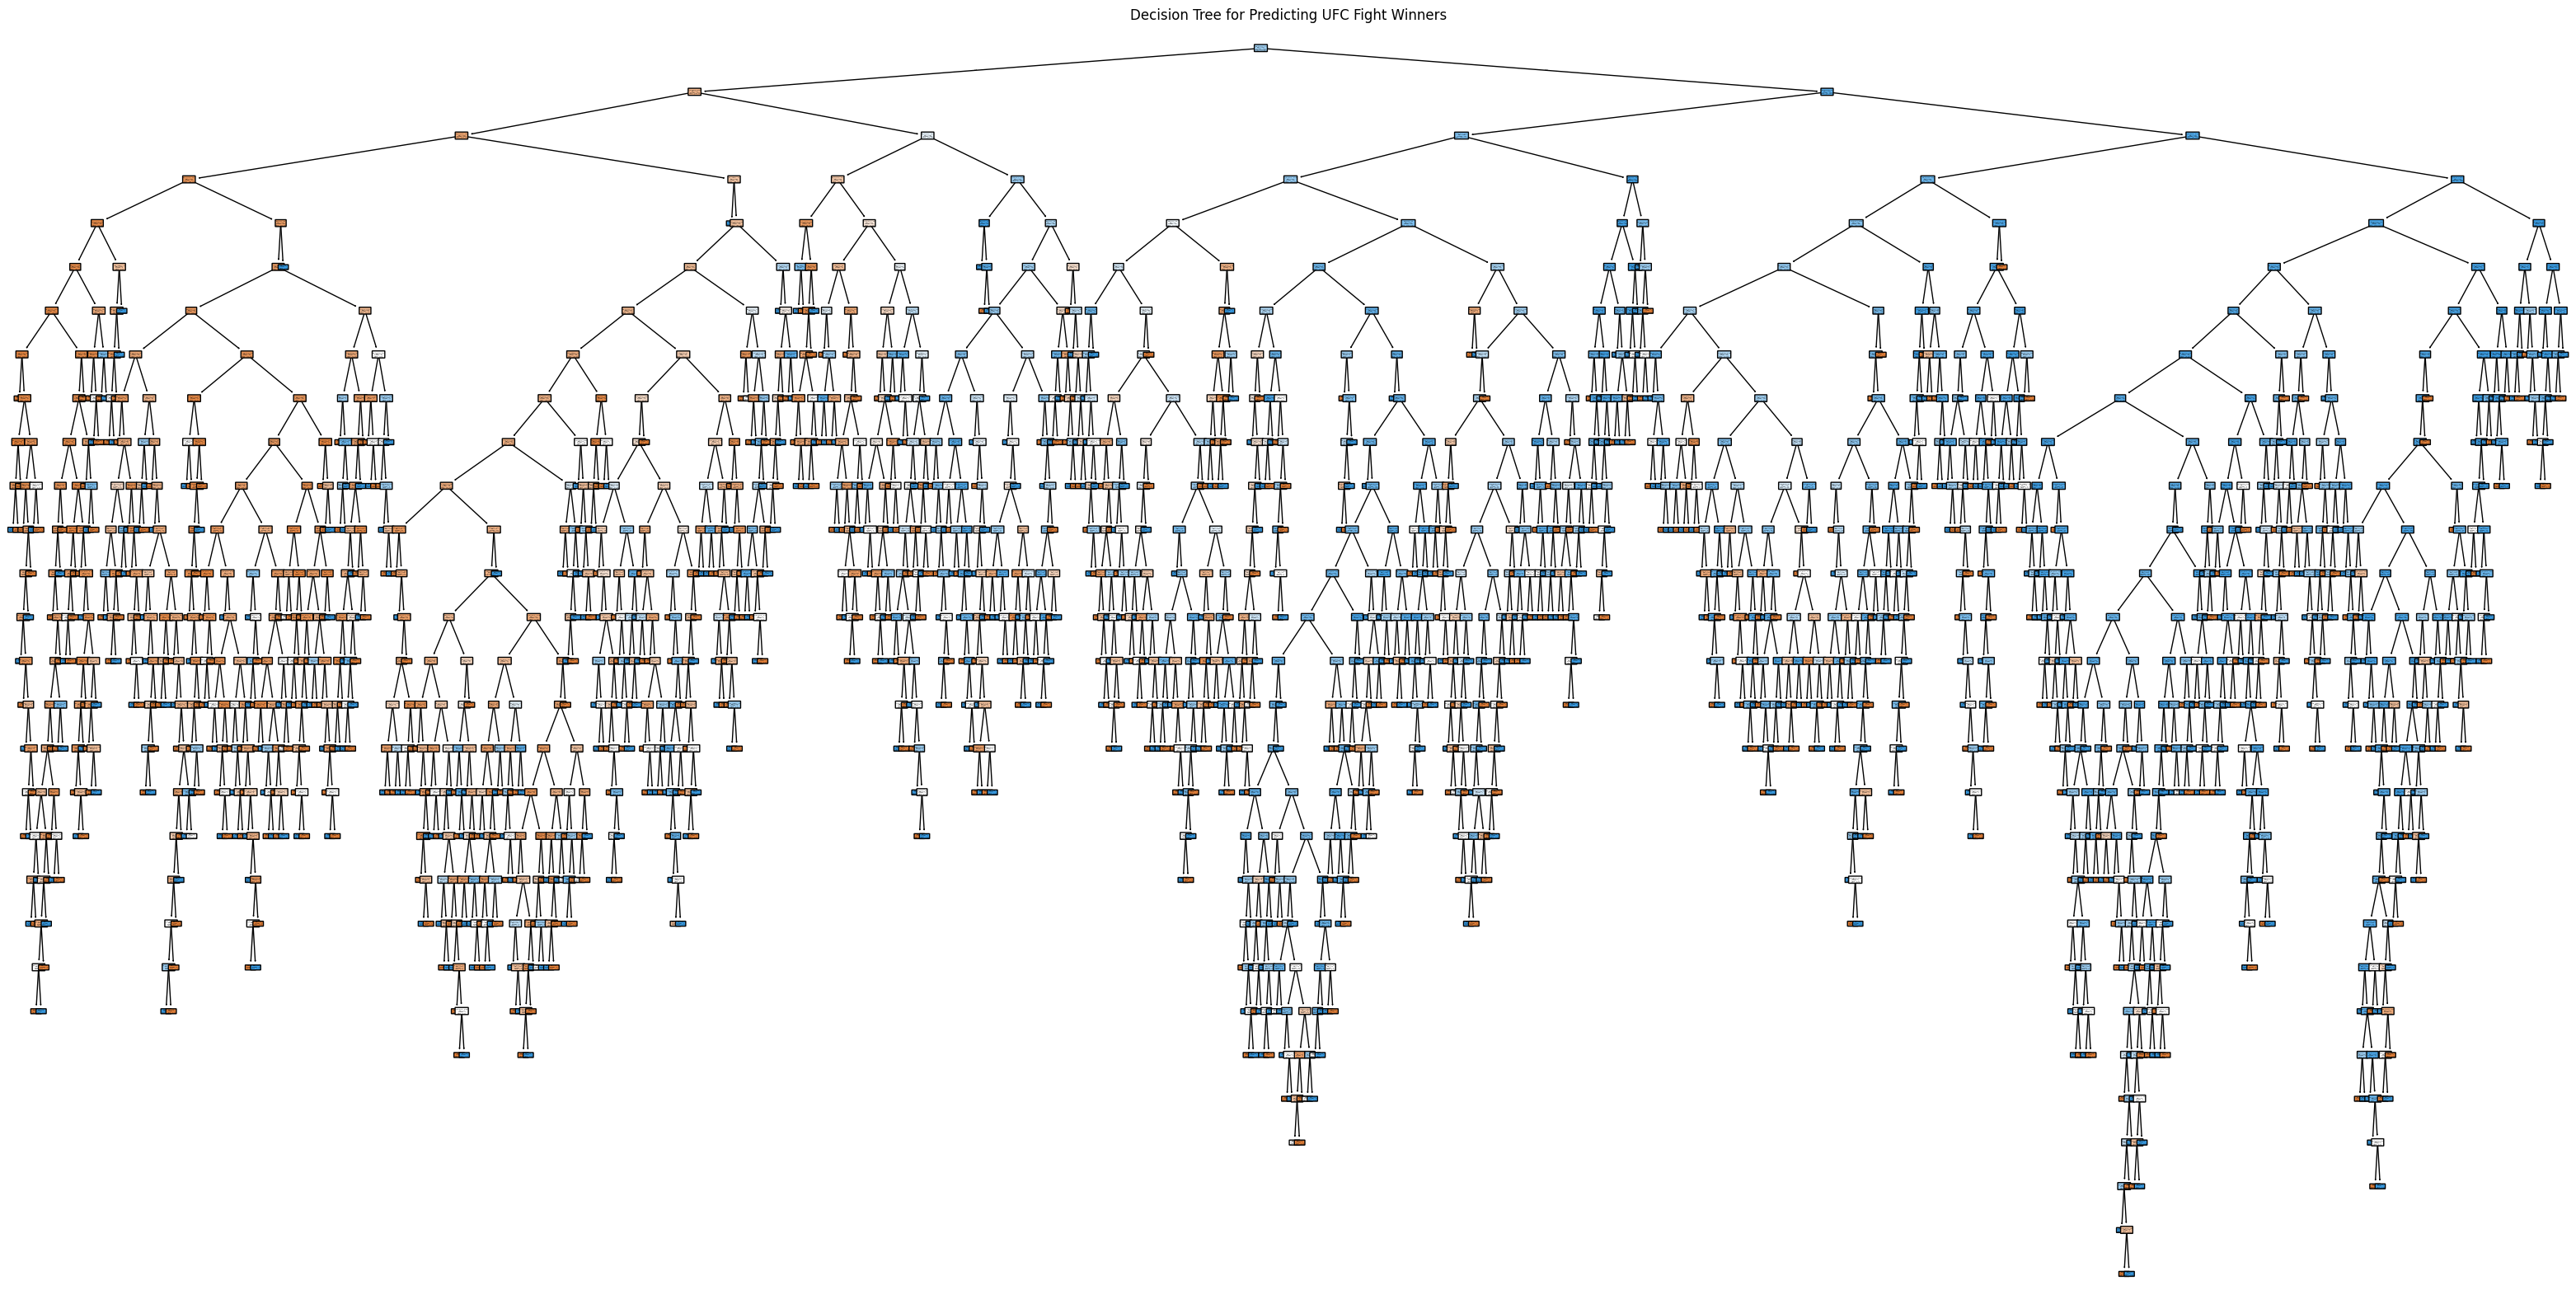

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
ufc_data_cleaned = pd.read_csv('../data/processed/ufc_fight_data_cleaned.csv')

# Encode categorical variable 'winner' to binary values: 1 for Red win, 0 for Blue win
ufc_data_cleaned['red_wins'] = (ufc_data_cleaned['winner'] == 'Red').astype(int)

# Define features and target variable
features = ['reach_diff', 'age_diff', 'sig_str_diff', 'td_acc_diff', 'total_rounds']  # You can modify as needed
X = ufc_data_cleaned[features]
y = ufc_data_cleaned['red_wins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit an unpruned decision tree model
clf = DecisionTreeClassifier(random_state=42)  # No max_depth specified for unpruned tree
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf, feature_names=features, class_names=['Blue Win', 'Red Win'], filled=True, rounded=True)
plt.title("Decision Tree for Predicting UFC Fight Winners")
plt.show()


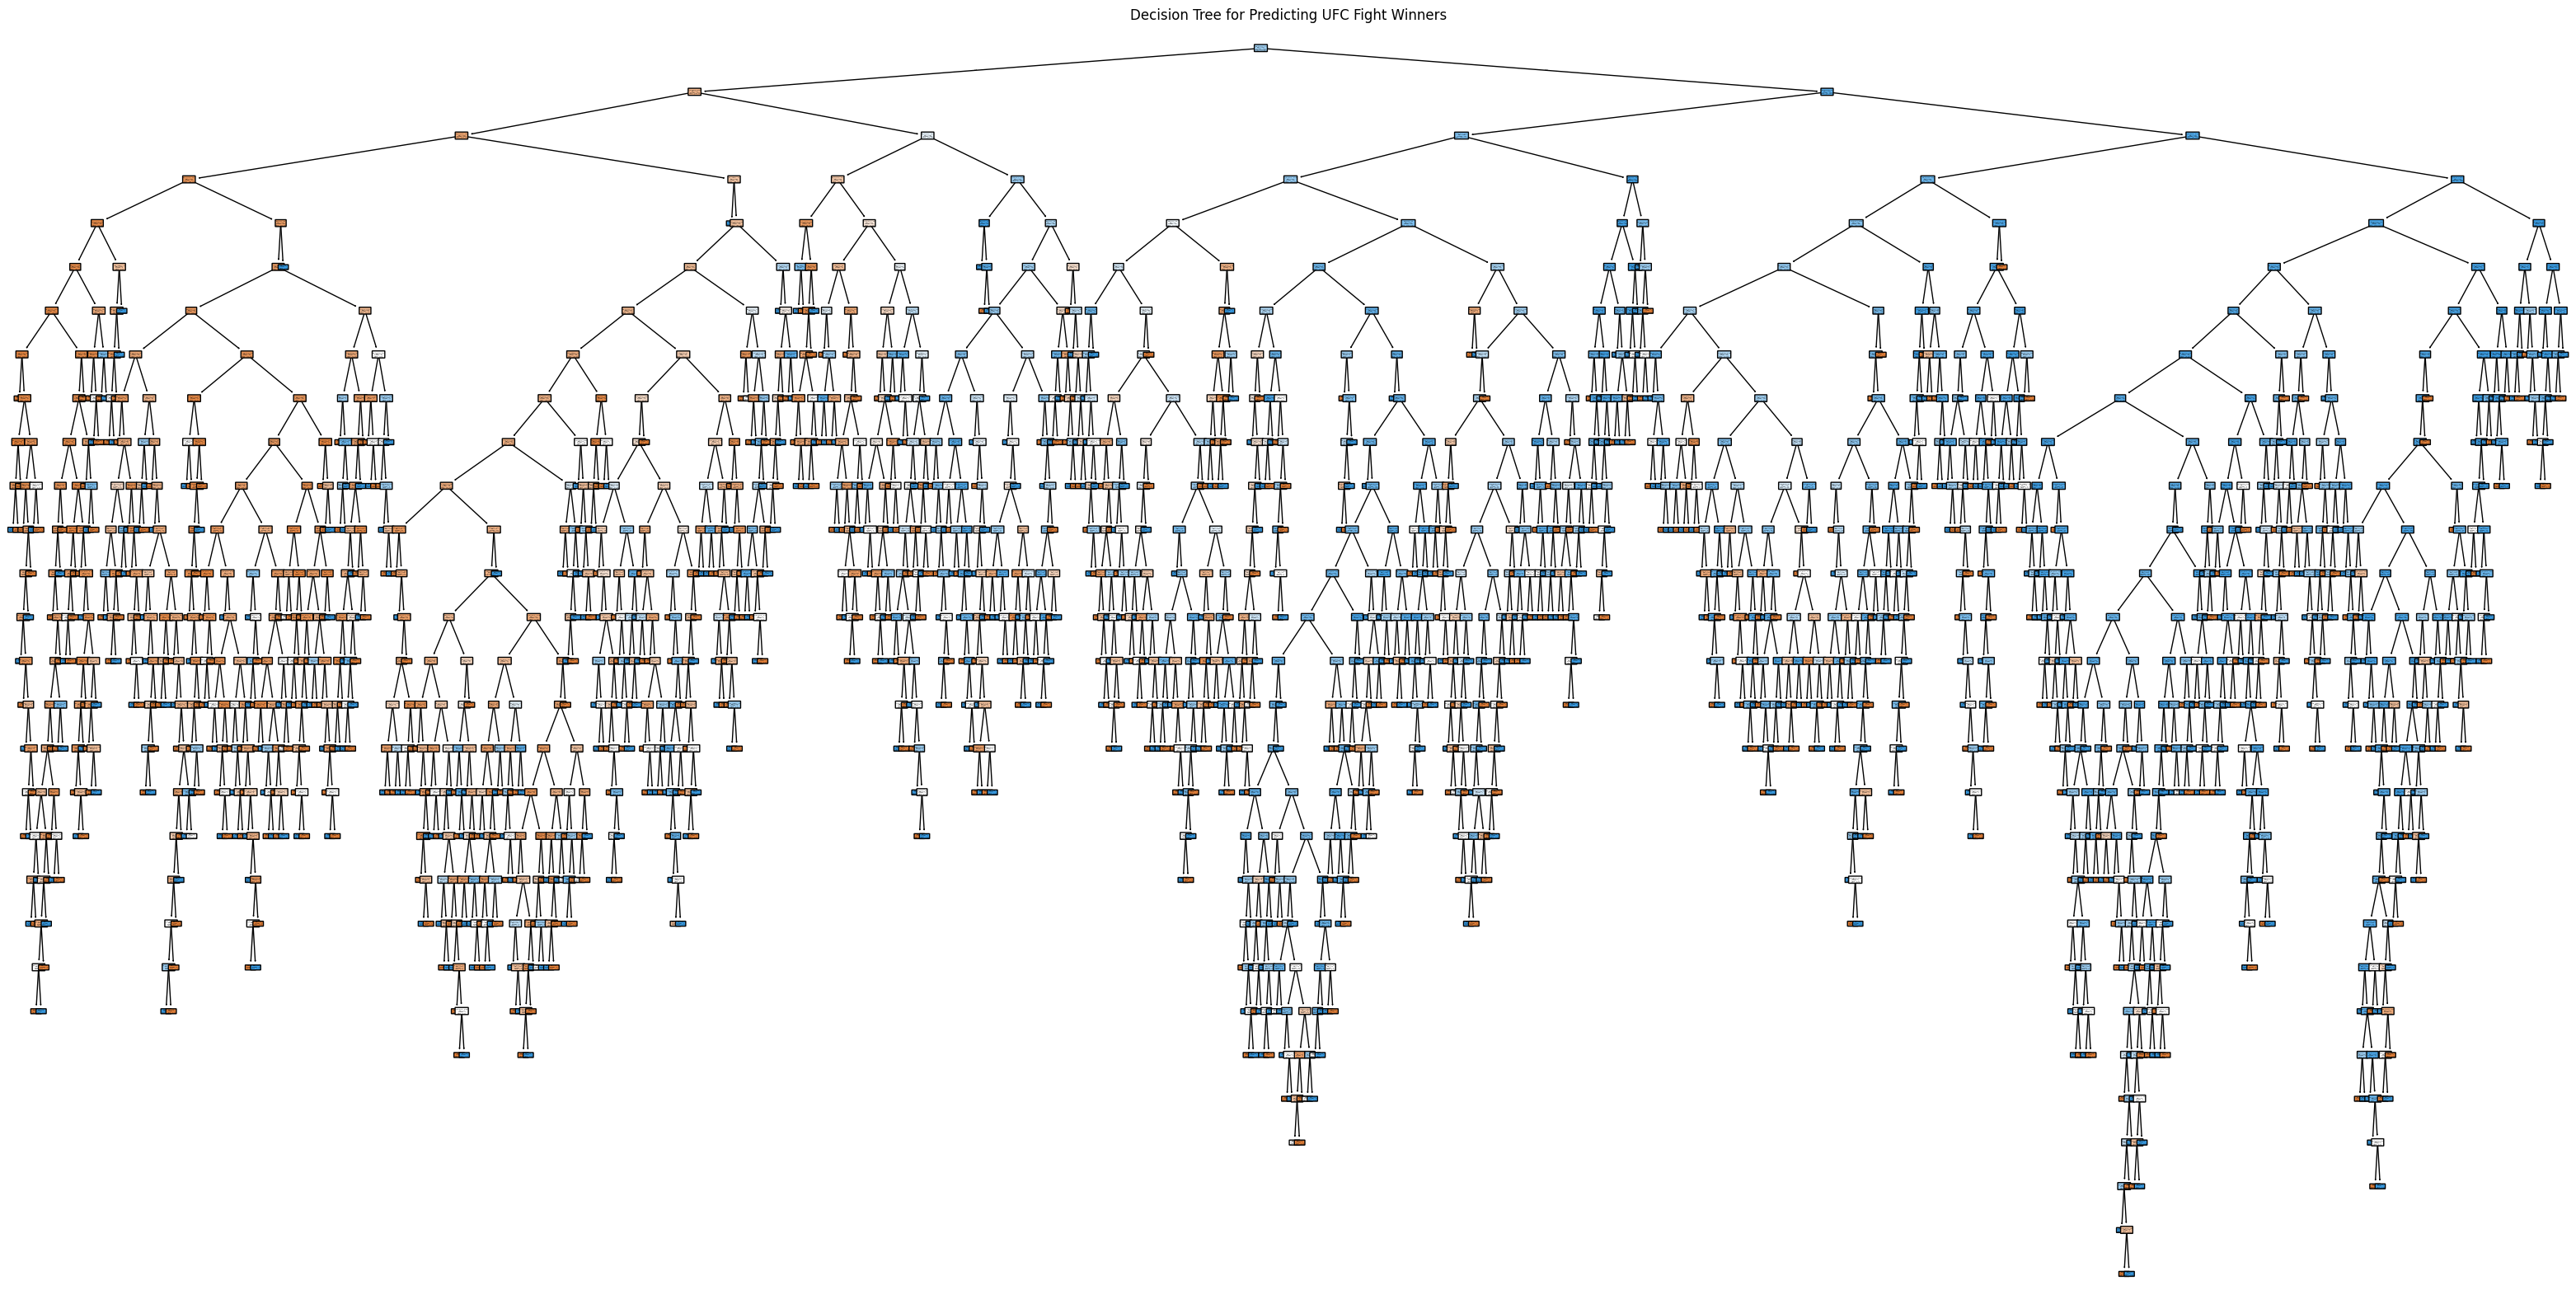

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
ufc_data_cleaned = pd.read_csv('../data/processed/ufc_fight_data_cleaned.csv')

# Encode categorical variable 'winner' to binary values: 1 for Red win, 0 for Blue win
ufc_data_cleaned['red_wins'] = (ufc_data_cleaned['winner'] == 'Red').astype(int)

# Define features and target variable
features = ['reach_diff', 'age_diff', 'sig_str_diff', 'td_acc_diff', 'total_rounds']  # You can modify as needed
X = ufc_data_cleaned[features]
y = ufc_data_cleaned['red_wins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit an unpruned decision tree model
clf = DecisionTreeClassifier(random_state=42)  # No max_depth specified for unpruned tree
clf.fit(X_train, y_train)

# Visualize the decision tree with a large figure size
plt.figure(figsize=(40, 20))  # Adjust the figure size as needed
plot_tree(clf, feature_names=features, class_names=['Blue Win', 'Red Win'], filled=True, rounded=True)
plt.title("Decision Tree for Predicting UFC Fight Winners")

# Save the figure with a high resolution to ensure readability
plt.savefig("large_decision_tree.png", dpi=300, bbox_inches='tight')  # Adjust dpi as needed for more detail

plt.show()


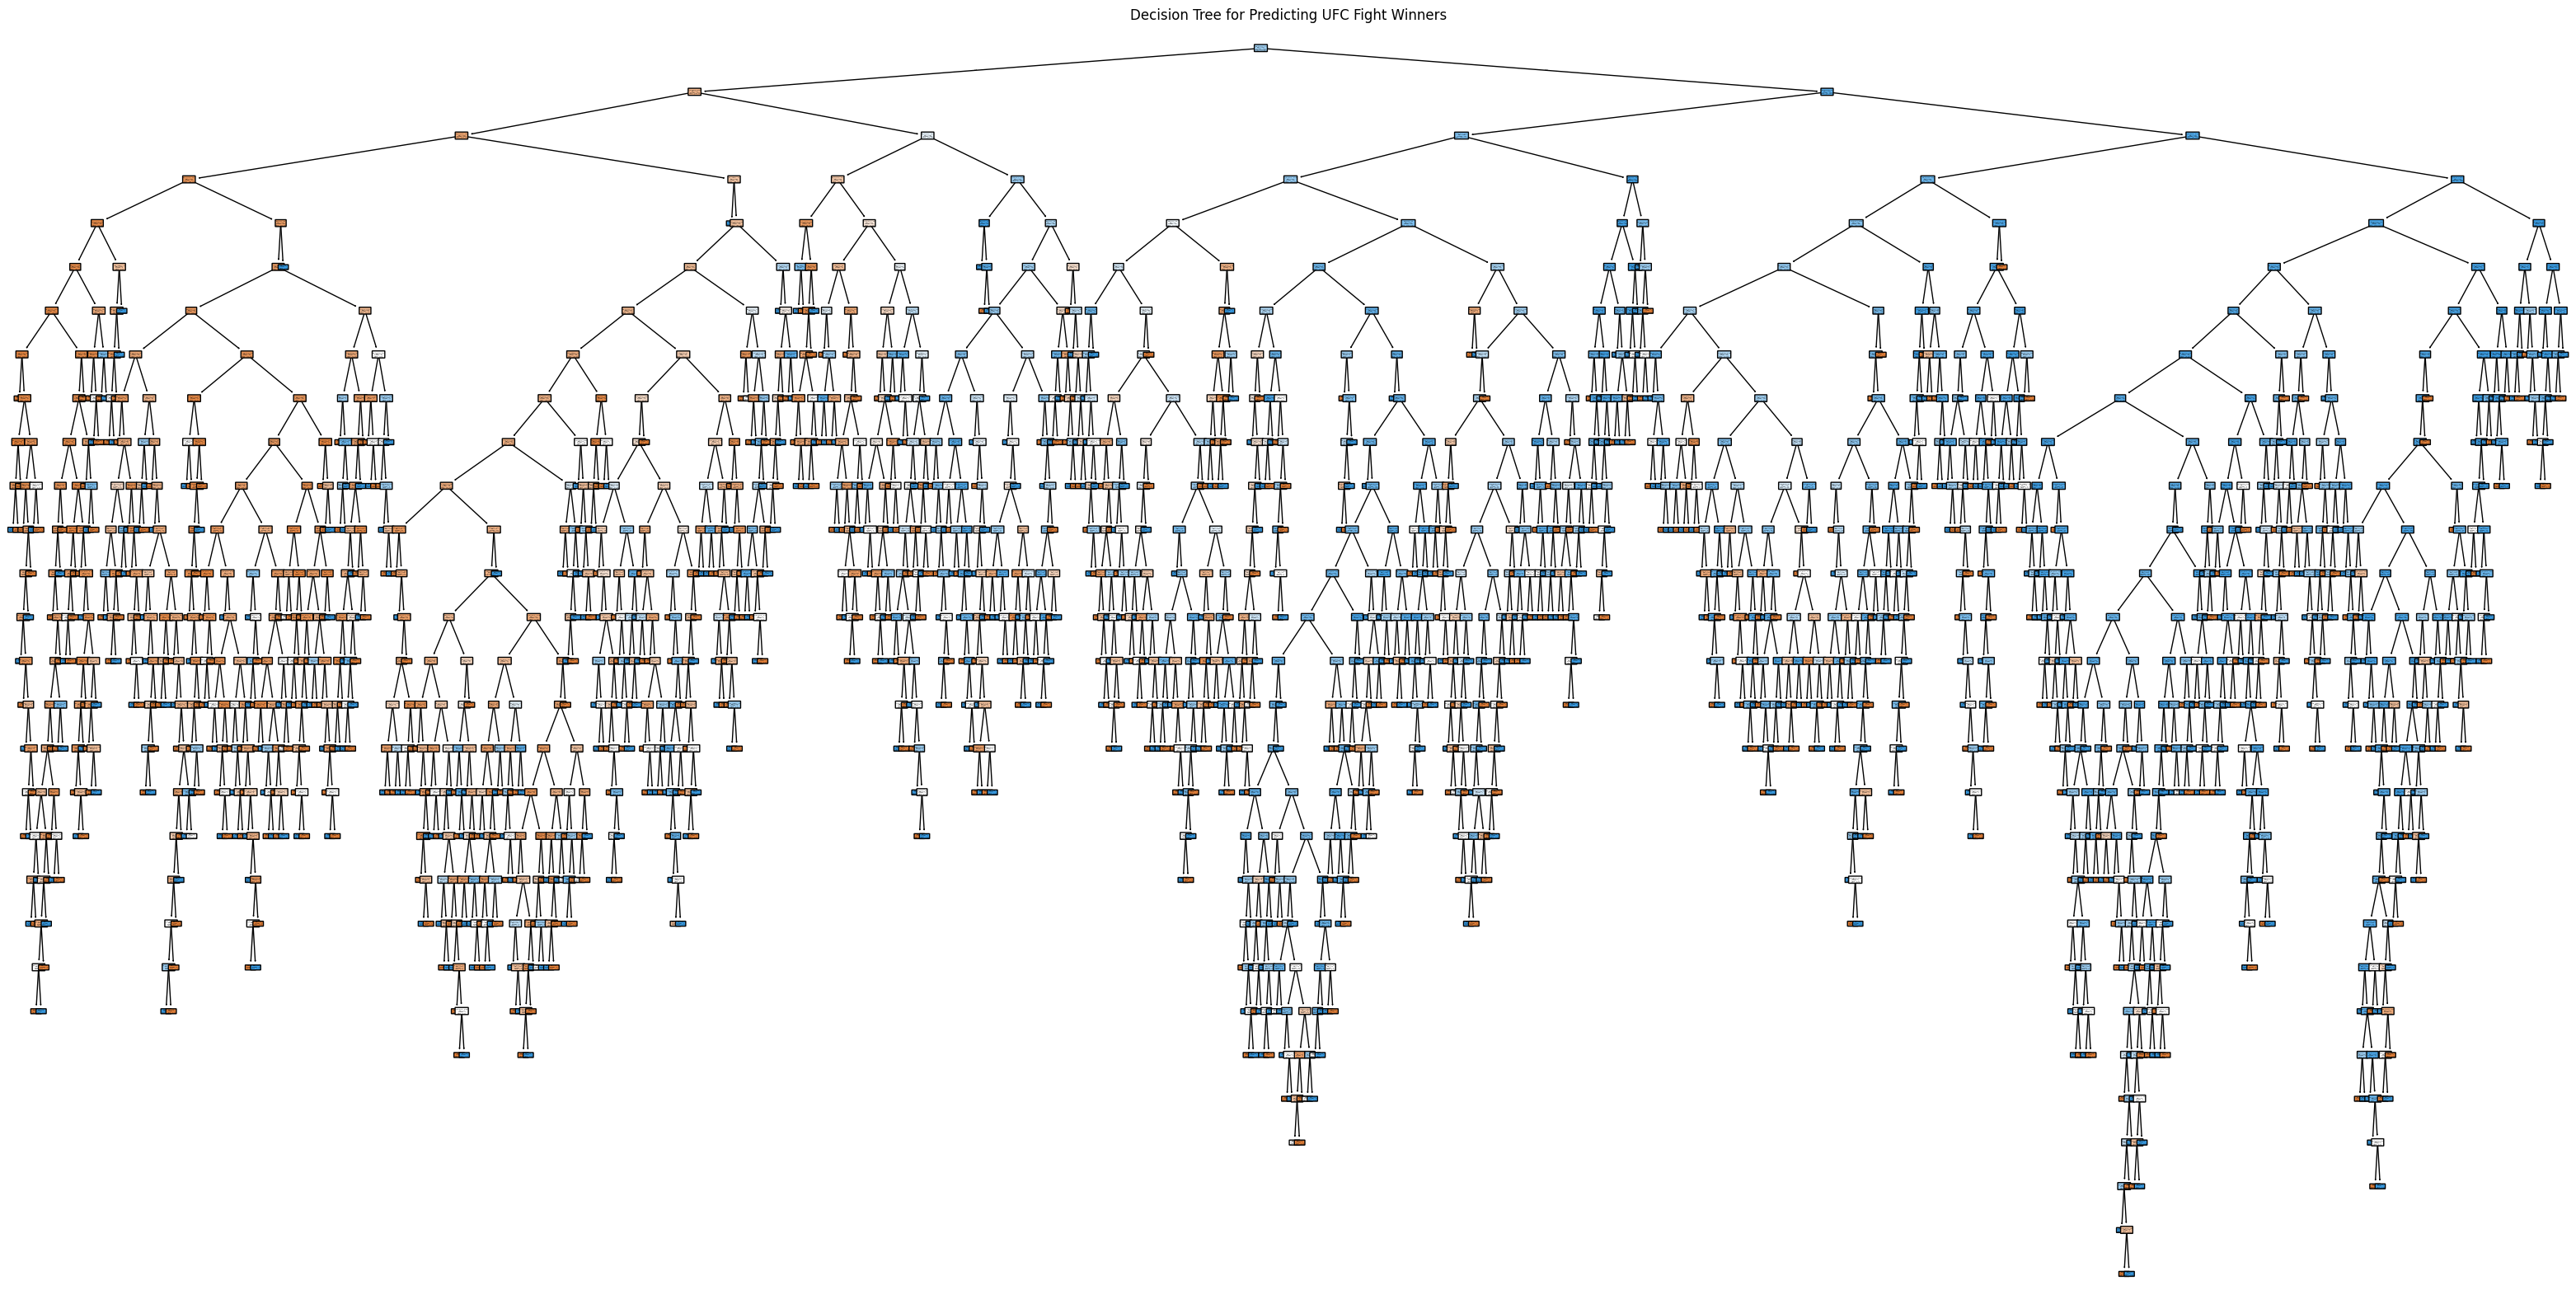

Decision tree rules saved to 'decision_tree_rules.txt'


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# Load the dataset
ufc_data_cleaned = pd.read_csv('../data/processed/ufc_fight_data_cleaned.csv')

# Encode categorical variable 'winner' to binary values: 1 for Red win, 0 for Blue win
ufc_data_cleaned['red_wins'] = (ufc_data_cleaned['winner'] == 'Red').astype(int)

# Define features and target variable
features = ['reach_diff', 'age_diff', 'sig_str_diff', 'td_acc_diff', 'total_rounds']  # You can modify as needed
X = ufc_data_cleaned[features]
y = ufc_data_cleaned['red_wins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit an unpruned decision tree model
clf = DecisionTreeClassifier(random_state=42)  # No max_depth specified for unpruned tree
clf.fit(X_train, y_train)

# Visualize the decision tree with a large figure size
plt.figure(figsize=(40, 20))  # Adjust the figure size as needed
plot_tree(clf, feature_names=features, class_names=['Blue Win', 'Red Win'], filled=True, rounded=True)
plt.title("Decision Tree for Predicting UFC Fight Winners")

# Save the figure with a high resolution to ensure readability
plt.savefig("large_decision_tree.png", dpi=300, bbox_inches='tight')  # Adjust dpi as needed for more detail

plt.show()

# Export the decision tree to a text format
tree_rules = export_text(clf, feature_names=features)
with open("decision_tree_rules.txt", "w") as f:
    f.write(tree_rules)

print("Decision tree rules saved to 'decision_tree_rules.txt'")


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# 1. Model Evaluation on Test Data
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate using metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.83
Precision: 0.86
Recall: 0.88
F1 Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       768
           1       0.86      0.88      0.87      1464

    accuracy                           0.83      2232
   macro avg       0.81      0.80      0.81      2232
weighted avg       0.83      0.83      0.83      2232



In [22]:
# 2. Model Optimization - Hyperparameter Tuning using Grid Search
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search for the best parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters found by the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\nBest Hyperparameters found by Grid Search:")
print(best_params)
print("\nEvaluating the Optimized Model:")

# Predict using the best model
y_pred_optimized = best_model.predict(X_test)

# Evaluate optimized model
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_precision = precision_score(y_test, y_pred_optimized)
optimized_recall = recall_score(y_test, y_pred_optimized)
optimized_f1 = f1_score(y_test, y_pred_optimized)

# Print evaluation results for the optimized model
print(f"Optimized Accuracy: {optimized_accuracy:.2f}")
print(f"Optimized Precision: {optimized_precision:.2f}")
print(f"Optimized Recall: {optimized_recall:.2f}")
print(f"Optimized F1 Score: {optimized_f1:.2f}")


Best Hyperparameters found by Grid Search:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

Evaluating the Optimized Model:
Optimized Accuracy: 0.83
Optimized Precision: 0.86
Optimized Recall: 0.89
Optimized F1 Score: 0.87


In [27]:
# Filter out rows where either fighter is Khabib or Conor McGregor
# Note: This example assumes the fighters' names appear exactly as "Khabib Nurmagomedov" and "Conor McGregor" in the dataset
khabib_conor_fights = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Khabib Nurmagomedov') & 
                                       (ufc_data_cleaned['b_fighter'] == 'Conor McGregor')]

# Check if we have data for this fight
khabib_conor_fights_sample = khabib_conor_fights.iloc[0] if not khabib_conor_fights.empty else None
# Updated code to include fighter names in the output
if khabib_conor_fights_sample is not None:
    # Determine fighters in original setup
    red_fighter = khabib_conor_fights_sample['r_fighter']
    blue_fighter = khabib_conor_fights_sample['b_fighter']

    # Create DataFrame for the original fight
    fight_data_original = pd.DataFrame({
        'reach_diff': [khabib_conor_fights_sample['reach_diff']],
        'age_diff': [khabib_conor_fights_sample['age_diff']],
        'sig_str_diff': [khabib_conor_fights_sample['sig_str_diff']],
        'td_acc_diff': [khabib_conor_fights_sample['td_acc_diff']],
        'total_rounds': [khabib_conor_fights_sample['total_rounds']]
    })

    # Swap corners (Khabib to blue, Conor to red)
    fight_data_swapped = pd.DataFrame({
        'reach_diff': [-khabib_conor_fights_sample['reach_diff']],
        'age_diff': [-khabib_conor_fights_sample['age_diff']],
        'sig_str_diff': [-khabib_conor_fights_sample['sig_str_diff']],
        'td_acc_diff': [-khabib_conor_fights_sample['td_acc_diff']],
        'total_rounds': [khabib_conor_fights_sample['total_rounds']]
    })

    # Make predictions
    prediction_original = clf.predict(fight_data_original)
    prediction_swapped = clf.predict(fight_data_swapped)

    # Determine the winner for each case in English
    original_winner_color = 'Red' if prediction_original[0] == 1 else 'Blue'
    original_winner_fighter = red_fighter if prediction_original[0] == 1 else blue_fighter
    swapped_winner_color = 'Red' if prediction_swapped[0] == 1 else 'Blue'
    swapped_winner_fighter = red_fighter if prediction_swapped[0] == 0 else blue_fighter

    print(f"Original Fight Prediction: Winner — {original_winner_color} ({original_winner_fighter}).")
    print(f"Swapped Corners Fight Prediction: Winner — {swapped_winner_color} ({swapped_winner_fighter}).")
else:
    print("No data found for a fight between Khabib Nurmagomedov and Conor McGregor.")






Original Fight Prediction: Winner — Red (Khabib Nurmagomedov).
Swapped Corners Fight Prediction: Winner — Blue (Khabib Nurmagomedov).


In [40]:
# Extract data for Khabib Nurmagomedov and Conor McGregor from the DataFrame if available
khabib_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Khabib Nurmagomedov') | 
                               (ufc_data_cleaned['b_fighter'] == 'Khabib Nurmagomedov')].iloc[0]

conor_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Conor McGregor') | 
                              (ufc_data_cleaned['b_fighter'] == 'Conor McGregor')].iloc[0]

# Create data for the hypothetical fight with Khabib in the red corner and Conor in the blue corner
fight_data_khabib_conor = pd.DataFrame({
    'reach_diff': [khabib_data['r_reach'] - conor_data['b_reach']],
    'age_diff': [khabib_data['r_age'] - conor_data['b_age']],
    'sig_str_diff': [khabib_data['r_SLpM_total'] - conor_data['b_SLpM_total']],
    'td_acc_diff': [khabib_data['r_td_acc_total'] - conor_data['b_td_acc_total']],
    'str_def_diff': [khabib_data['r_str_def_total'] - conor_data['b_str_def_total']],
    'td_def_diff': [khabib_data['r_td_def_total'] - conor_data['b_td_def_total']],
    'height_diff': [khabib_data['r_height'] - conor_data['b_height']],
    'weight_diff': [khabib_data['r_weight'] - conor_data['b_weight']],
    'SLpM_total_diff': [khabib_data['r_SLpM_total'] - conor_data['b_SLpM_total']],
    'SApM_total_diff': [khabib_data['r_SApM_total'] - conor_data['b_SApM_total']],
    'sub_avg_diff': [khabib_data['r_sub_avg'] - conor_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the fight
prediction_khabib_conor = clf_extended.predict(fight_data_khabib_conor)

# Determine the predicted winner
predicted_winner_color_khabib_conor = 'Red' if prediction_khabib_conor[0] == 1 else 'Blue'
predicted_winner_fighter_khabib_conor = 'Khabib Nurmagomedov' if prediction_khabib_conor[0] == 1 else 'Conor McGregor'

print(f"Prediction for Hypothetical Fight (Khabib vs Conor): Winner — {predicted_winner_color_khabib_conor} ({predicted_winner_fighter_khabib_conor}).")

# Create data for the swapped fight with Conor in the red corner and Khabib in the blue corner
fight_data_conor_khabib_swapped = pd.DataFrame({
    'reach_diff': [conor_data['r_reach'] - khabib_data['b_reach']],
    'age_diff': [conor_data['r_age'] - khabib_data['b_age']],
    'sig_str_diff': [conor_data['r_SLpM_total'] - khabib_data['b_SLpM_total']],
    'td_acc_diff': [conor_data['r_td_acc_total'] - khabib_data['b_td_acc_total']],
    'str_def_diff': [conor_data['r_str_def_total'] - khabib_data['b_str_def_total']],
    'td_def_diff': [conor_data['r_td_def_total'] - khabib_data['b_td_def_total']],
    'height_diff': [conor_data['r_height'] - khabib_data['b_height']],
    'weight_diff': [conor_data['r_weight'] - khabib_data['b_weight']],
    'SLpM_total_diff': [conor_data['r_SLpM_total'] - khabib_data['b_SLpM_total']],
    'SApM_total_diff': [conor_data['r_SApM_total'] - khabib_data['b_SApM_total']],
    'sub_avg_diff': [conor_data['r_sub_avg'] - khabib_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the swapped fight
prediction_conor_khabib_swapped = clf_extended.predict(fight_data_conor_khabib_swapped)

# Determine the predicted winner
predicted_winner_color_conor_khabib_swapped = 'Red' if prediction_conor_khabib_swapped[0] == 1 else 'Blue'
predicted_winner_fighter_conor_khabib_swapped = 'Conor McGregor' if prediction_conor_khabib_swapped[0] == 1 else 'Khabib Nurmagomedov'

print(f"Prediction for Hypothetical Fight with Swapped Positions (Conor vs Khabib): Winner — {predicted_winner_color_conor_khabib_swapped} ({predicted_winner_fighter_conor_khabib_swapped}).")



Prediction for Hypothetical Fight (Khabib vs Conor): Winner — Red (Khabib Nurmagomedov).
Prediction for Hypothetical Fight with Swapped Positions (Conor vs Khabib): Winner — Blue (Khabib Nurmagomedov).


In [41]:
# Extract data for Khabib Nurmagomedov and Robert Whittaker from the DataFrame if available
khabib_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Khabib Nurmagomedov') | 
                               (ufc_data_cleaned['b_fighter'] == 'Khabib Nurmagomedov')].iloc[0]

robert_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Robert Whittaker') | 
                               (ufc_data_cleaned['b_fighter'] == 'Robert Whittaker')].iloc[0]

# Create data for the hypothetical fight with Khabib in the red corner and Robert in the blue corner
fight_data_khabib_robert = pd.DataFrame({
    'reach_diff': [khabib_data['r_reach'] - robert_data['b_reach']],
    'age_diff': [khabib_data['r_age'] - robert_data['b_age']],
    'sig_str_diff': [khabib_data['r_SLpM_total'] - robert_data['b_SLpM_total']],
    'td_acc_diff': [khabib_data['r_td_acc_total'] - robert_data['b_td_acc_total']],
    'str_def_diff': [khabib_data['r_str_def_total'] - robert_data['b_str_def_total']],
    'td_def_diff': [khabib_data['r_td_def_total'] - robert_data['b_td_def_total']],
    'height_diff': [khabib_data['r_height'] - robert_data['b_height']],
    'weight_diff': [khabib_data['r_weight'] - robert_data['b_weight']],
    'SLpM_total_diff': [khabib_data['r_SLpM_total'] - robert_data['b_SLpM_total']],
    'SApM_total_diff': [khabib_data['r_SApM_total'] - robert_data['b_SApM_total']],
    'sub_avg_diff': [khabib_data['r_sub_avg'] - robert_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the fight
prediction_khabib_robert = clf_extended.predict(fight_data_khabib_robert)

# Determine the predicted winner
predicted_winner_color_khabib_robert = 'Red' if prediction_khabib_robert[0] == 1 else 'Blue'
predicted_winner_fighter_khabib_robert = 'Khabib Nurmagomedov' if prediction_khabib_robert[0] == 1 else 'Robert Whittaker'

print(f"Prediction for Hypothetical Fight (Khabib vs Robert): Winner — {predicted_winner_color_khabib_robert} ({predicted_winner_fighter_khabib_robert}).")

# Create data for the swapped fight with Robert in the red corner and Khabib in the blue corner
fight_data_robert_khabib_swapped = pd.DataFrame({
    'reach_diff': [robert_data['r_reach'] - khabib_data['b_reach']],
    'age_diff': [robert_data['r_age'] - khabib_data['b_age']],
    'sig_str_diff': [robert_data['r_SLpM_total'] - khabib_data['b_SLpM_total']],
    'td_acc_diff': [robert_data['r_td_acc_total'] - khabib_data['b_td_acc_total']],
    'str_def_diff': [robert_data['r_str_def_total'] - khabib_data['b_str_def_total']],
    'td_def_diff': [robert_data['r_td_def_total'] - khabib_data['b_td_def_total']],
    'height_diff': [robert_data['r_height'] - khabib_data['b_height']],
    'weight_diff': [robert_data['r_weight'] - khabib_data['b_weight']],
    'SLpM_total_diff': [robert_data['r_SLpM_total'] - khabib_data['b_SLpM_total']],
    'SApM_total_diff': [robert_data['r_SApM_total'] - khabib_data['b_SApM_total']],
    'sub_avg_diff': [robert_data['r_sub_avg'] - khabib_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the swapped fight
prediction_robert_khabib_swapped = clf_extended.predict(fight_data_robert_khabib_swapped)

# Determine the predicted winner
predicted_winner_color_robert_khabib_swapped = 'Red' if prediction_robert_khabib_swapped[0] == 1 else 'Blue'
predicted_winner_fighter_robert_khabib_swapped = 'Robert Whittaker' if prediction_robert_khabib_swapped[0] == 1 else 'Khabib Nurmagomedov'

print(f"Prediction for Hypothetical Fight with Swapped Positions (Robert vs Khabib): Winner — {predicted_winner_color_robert_khabib_swapped} ({predicted_winner_fighter_robert_khabib_swapped}).")



Prediction for Hypothetical Fight (Khabib vs Robert): Winner — Blue (Robert Whittaker).
Prediction for Hypothetical Fight with Swapped Positions (Robert vs Khabib): Winner — Blue (Khabib Nurmagomedov).


In [38]:
# Extract data for Khamzat Chimaev and Robert Whittaker from the DataFrame if available
khamzat_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Khamzat Chimaev') | 
                                (ufc_data_cleaned['b_fighter'] == 'Khamzat Chimaev')].iloc[0]

robert_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Robert Whittaker') | 
                               (ufc_data_cleaned['b_fighter'] == 'Robert Whittaker')].iloc[0]

# Prepare a more comprehensive feature set for model training
features_extended = [
    'reach_diff', 'age_diff', 'sig_str_diff', 'td_acc_diff', 'str_def_diff', 
    'td_def_diff', 'height_diff', 'weight_diff', 'SLpM_total_diff', 
    'SApM_total_diff', 'sub_avg_diff', 'total_rounds'
]

# Standardize feature names to match the training data
# Ensuring feature names in the hypothetical data are consistent with those used for training
fight_data_corrected = pd.DataFrame({
    'reach_diff': [khamzat_data['r_reach'] - robert_data['b_reach']],
    'age_diff': [khamzat_data['r_age'] - robert_data['b_age']],
    'sig_str_diff': [khamzat_data['r_SLpM_total'] - robert_data['b_SLpM_total']],
    'td_acc_diff': [khamzat_data['r_td_acc_total'] - robert_data['b_td_acc_total']],
    'str_def_diff': [khamzat_data['r_str_def_total'] - robert_data['b_str_def_total']],
    'td_def_diff': [khamzat_data['r_td_def_total'] - robert_data['b_td_def_total']],
    'height_diff': [khamzat_data['r_height'] - robert_data['b_height']],
    'weight_diff': [khamzat_data['r_weight'] - robert_data['b_weight']],
    'SLpM_total_diff': [khamzat_data['r_SLpM_total'] - robert_data['b_SLpM_total']],
    'SApM_total_diff': [khamzat_data['r_SApM_total'] - robert_data['b_SApM_total']],
    'sub_avg_diff': [khamzat_data['r_sub_avg'] - robert_data['b_sub_avg']],
    'total_rounds': [5]  # Typical for a non-title fight
})

# Predict using the corrected features
prediction_corrected = clf_extended.predict(fight_data_corrected)

# Determine the predicted winner
predicted_winner_color_corrected = 'Red' if prediction_corrected[0] == 1 else 'Blue'
predicted_winner_fighter_corrected = 'Khamzat Chimaev' if prediction_corrected[0] == 1 else 'Robert Whittaker'

print(f"Prediction for Hypothetical Fight with Corrected Features: Winner — {predicted_winner_color_corrected} ({predicted_winner_fighter_corrected}).")





Prediction for Hypothetical Fight with Corrected Features: Winner — Blue (Robert Whittaker).


In [42]:
# Extract data for Ilia Topuria and Max Holloway from the DataFrame if available
ilia_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Ilia Topuria') | 
                             (ufc_data_cleaned['b_fighter'] == 'Ilia Topuria')].iloc[0]

max_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Max Holloway') | 
                            (ufc_data_cleaned['b_fighter'] == 'Max Holloway')].iloc[0]

# Create data for the hypothetical fight with Ilia in the red corner and Max in the blue corner
fight_data_ilia_max = pd.DataFrame({
    'reach_diff': [ilia_data['r_reach'] - max_data['b_reach']],
    'age_diff': [ilia_data['r_age'] - max_data['b_age']],
    'sig_str_diff': [ilia_data['r_SLpM_total'] - max_data['b_SLpM_total']],
    'td_acc_diff': [ilia_data['r_td_acc_total'] - max_data['b_td_acc_total']],
    'str_def_diff': [ilia_data['r_str_def_total'] - max_data['b_str_def_total']],
    'td_def_diff': [ilia_data['r_td_def_total'] - max_data['b_td_def_total']],
    'height_diff': [ilia_data['r_height'] - max_data['b_height']],
    'weight_diff': [ilia_data['r_weight'] - max_data['b_weight']],
    'SLpM_total_diff': [ilia_data['r_SLpM_total'] - max_data['b_SLpM_total']],
    'SApM_total_diff': [ilia_data['r_SApM_total'] - max_data['b_SApM_total']],
    'sub_avg_diff': [ilia_data['r_sub_avg'] - max_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the fight
prediction_ilia_max = clf_extended.predict(fight_data_ilia_max)

# Determine the predicted winner
predicted_winner_color_ilia_max = 'Red' if prediction_ilia_max[0] == 1 else 'Blue'
predicted_winner_fighter_ilia_max = 'Ilia Topuria' if prediction_ilia_max[0] == 1 else 'Max Holloway'

print(f"Prediction for Hypothetical Fight (Ilia vs Max): Winner — {predicted_winner_color_ilia_max} ({predicted_winner_fighter_ilia_max}).")

# Create data for the swapped fight with Max in the red corner and Ilia in the blue corner
fight_data_max_ilia_swapped = pd.DataFrame({
    'reach_diff': [max_data['r_reach'] - ilia_data['b_reach']],
    'age_diff': [max_data['r_age'] - ilia_data['b_age']],
    'sig_str_diff': [max_data['r_SLpM_total'] - ilia_data['b_SLpM_total']],
    'td_acc_diff': [max_data['r_td_acc_total'] - ilia_data['b_td_acc_total']],
    'str_def_diff': [max_data['r_str_def_total'] - ilia_data['b_str_def_total']],
    'td_def_diff': [max_data['r_td_def_total'] - ilia_data['b_td_def_total']],
    'height_diff': [max_data['r_height'] - ilia_data['b_height']],
    'weight_diff': [max_data['r_weight'] - ilia_data['b_weight']],
    'SLpM_total_diff': [max_data['r_SLpM_total'] - ilia_data['b_SLpM_total']],
    'SApM_total_diff': [max_data['r_SApM_total'] - ilia_data['b_SApM_total']],
    'sub_avg_diff': [max_data['r_sub_avg'] - ilia_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the swapped fight
prediction_max_ilia_swapped = clf_extended.predict(fight_data_max_ilia_swapped)

# Determine the predicted winner
predicted_winner_color_max_ilia_swapped = 'Red' if prediction_max_ilia_swapped[0] == 1 else 'Blue'
predicted_winner_fighter_max_ilia_swapped = 'Max Holloway' if prediction_max_ilia_swapped[0] == 1 else 'Ilia Topuria'

print(f"Prediction for Hypothetical Fight with Swapped Positions (Max vs Ilia): Winner — {predicted_winner_color_max_ilia_swapped} ({predicted_winner_fighter_max_ilia_swapped}).")



Prediction for Hypothetical Fight (Ilia vs Max): Winner — Red (Ilia Topuria).
Prediction for Hypothetical Fight with Swapped Positions (Max vs Ilia): Winner — Red (Max Holloway).


In [43]:
# Extract data for Magomed Ankalaev and Aleksandar Rakic from the DataFrame if available
magomed_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Magomed Ankalaev') | 
                                (ufc_data_cleaned['b_fighter'] == 'Magomed Ankalaev')].iloc[0]

aleksandar_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Aleksandar Rakic') | 
                                   (ufc_data_cleaned['b_fighter'] == 'Aleksandar Rakic')].iloc[0]

# Create data for the hypothetical fight with Magomed in the red corner and Aleksandar in the blue corner
fight_data_magomed_aleksandar = pd.DataFrame({
    'reach_diff': [magomed_data['r_reach'] - aleksandar_data['b_reach']],
    'age_diff': [magomed_data['r_age'] - aleksandar_data['b_age']],
    'sig_str_diff': [magomed_data['r_SLpM_total'] - aleksandar_data['b_SLpM_total']],
    'td_acc_diff': [magomed_data['r_td_acc_total'] - aleksandar_data['b_td_acc_total']],
    'str_def_diff': [magomed_data['r_str_def_total'] - aleksandar_data['b_str_def_total']],
    'td_def_diff': [magomed_data['r_td_def_total'] - aleksandar_data['b_td_def_total']],
    'height_diff': [magomed_data['r_height'] - aleksandar_data['b_height']],
    'weight_diff': [magomed_data['r_weight'] - aleksandar_data['b_weight']],
    'SLpM_total_diff': [magomed_data['r_SLpM_total'] - aleksandar_data['b_SLpM_total']],
    'SApM_total_diff': [magomed_data['r_SApM_total'] - aleksandar_data['b_SApM_total']],
    'sub_avg_diff': [magomed_data['r_sub_avg'] - aleksandar_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the fight
prediction_magomed_aleksandar = clf_extended.predict(fight_data_magomed_aleksandar)

# Determine the predicted winner
predicted_winner_color_magomed_aleksandar = 'Red' if prediction_magomed_aleksandar[0] == 1 else 'Blue'
predicted_winner_fighter_magomed_aleksandar = 'Magomed Ankalaev' if prediction_magomed_aleksandar[0] == 1 else 'Aleksandar Rakic'

print(f"Prediction for Hypothetical Fight (Magomed vs Aleksandar): Winner — {predicted_winner_color_magomed_aleksandar} ({predicted_winner_fighter_magomed_aleksandar}).")

# Create data for the swapped fight with Aleksandar in the red corner and Magomed in the blue corner
fight_data_aleksandar_magomed_swapped = pd.DataFrame({
    'reach_diff': [aleksandar_data['r_reach'] - magomed_data['b_reach']],
    'age_diff': [aleksandar_data['r_age'] - magomed_data['b_age']],
    'sig_str_diff': [aleksandar_data['r_SLpM_total'] - magomed_data['b_SLpM_total']],
    'td_acc_diff': [aleksandar_data['r_td_acc_total'] - magomed_data['b_td_acc_total']],
    'str_def_diff': [aleksandar_data['r_str_def_total'] - magomed_data['b_str_def_total']],
    'td_def_diff': [aleksandar_data['r_td_def_total'] - magomed_data['b_td_def_total']],
    'height_diff': [aleksandar_data['r_height'] - magomed_data['b_height']],
    'weight_diff': [aleksandar_data['r_weight'] - magomed_data['b_weight']],
    'SLpM_total_diff': [aleksandar_data['r_SLpM_total'] - magomed_data['b_SLpM_total']],
    'SApM_total_diff': [aleksandar_data['r_SApM_total'] - magomed_data['b_SApM_total']],
    'sub_avg_diff': [aleksandar_data['r_sub_avg'] - magomed_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the swapped fight
prediction_aleksandar_magomed_swapped = clf_extended.predict(fight_data_aleksandar_magomed_swapped)

# Determine the predicted winner
predicted_winner_color_aleksandar_magomed_swapped = 'Red' if prediction_aleksandar_magomed_swapped[0] == 1 else 'Blue'
predicted_winner_fighter_aleksandar_magomed_swapped = 'Aleksandar Rakic' if prediction_aleksandar_magomed_swapped[0] == 1 else 'Magomed Ankalaev'

print(f"Prediction for Hypothetical Fight with Swapped Positions (Aleksandar vs Magomed): Winner — {predicted_winner_color_aleksandar_magomed_swapped} ({predicted_winner_fighter_aleksandar_magomed_swapped}).")



Prediction for Hypothetical Fight (Magomed vs Aleksandar): Winner — Red (Magomed Ankalaev).
Prediction for Hypothetical Fight with Swapped Positions (Aleksandar vs Magomed): Winner — Blue (Magomed Ankalaev).


In [44]:
# Extract data for Shara Magomedov and Armen Petrosyan from the DataFrame if available
shara_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Shara Magomedov') | 
                              (ufc_data_cleaned['b_fighter'] == 'Shara Magomedov')].iloc[0]

armen_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Armen Petrosyan') | 
                              (ufc_data_cleaned['b_fighter'] == 'Armen Petrosyan')].iloc[0]

# Create data for the hypothetical fight with Shara in the red corner and Armen in the blue corner
fight_data_shara_armen = pd.DataFrame({
    'reach_diff': [shara_data['r_reach'] - armen_data['b_reach']],
    'age_diff': [shara_data['r_age'] - armen_data['b_age']],
    'sig_str_diff': [shara_data['r_SLpM_total'] - armen_data['b_SLpM_total']],
    'td_acc_diff': [shara_data['r_td_acc_total'] - armen_data['b_td_acc_total']],
    'str_def_diff': [shara_data['r_str_def_total'] - armen_data['b_str_def_total']],
    'td_def_diff': [shara_data['r_td_def_total'] - armen_data['b_td_def_total']],
    'height_diff': [shara_data['r_height'] - armen_data['b_height']],
    'weight_diff': [shara_data['r_weight'] - armen_data['b_weight']],
    'SLpM_total_diff': [shara_data['r_SLpM_total'] - armen_data['b_SLpM_total']],
    'SApM_total_diff': [shara_data['r_SApM_total'] - armen_data['b_SApM_total']],
    'sub_avg_diff': [shara_data['r_sub_avg'] - armen_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the fight
prediction_shara_armen = clf_extended.predict(fight_data_shara_armen)

# Determine the predicted winner
predicted_winner_color_shara_armen = 'Red' if prediction_shara_armen[0] == 1 else 'Blue'
predicted_winner_fighter_shara_armen = 'Shara Magomedov' if prediction_shara_armen[0] == 1 else 'Armen Petrosyan'

print(f"Prediction for Hypothetical Fight (Shara vs Armen): Winner — {predicted_winner_color_shara_armen} ({predicted_winner_fighter_shara_armen}).")

# Create data for the swapped fight with Armen in the red corner and Shara in the blue corner
fight_data_armen_shara_swapped = pd.DataFrame({
    'reach_diff': [armen_data['r_reach'] - shara_data['b_reach']],
    'age_diff': [armen_data['r_age'] - shara_data['b_age']],
    'sig_str_diff': [armen_data['r_SLpM_total'] - shara_data['b_SLpM_total']],
    'td_acc_diff': [armen_data['r_td_acc_total'] - shara_data['b_td_acc_total']],
    'str_def_diff': [armen_data['r_str_def_total'] - shara_data['b_str_def_total']],
    'td_def_diff': [armen_data['r_td_def_total'] - shara_data['b_td_def_total']],
    'height_diff': [armen_data['r_height'] - shara_data['b_height']],
    'weight_diff': [armen_data['r_weight'] - shara_data['b_weight']],
    'SLpM_total_diff': [armen_data['r_SLpM_total'] - shara_data['b_SLpM_total']],
    'SApM_total_diff': [armen_data['r_SApM_total'] - shara_data['b_SApM_total']],
    'sub_avg_diff': [armen_data['r_sub_avg'] - shara_data['b_sub_avg']],
    'total_rounds': [5]  # Assuming a title fight or a main event fight
})

# Predict the result for the swapped fight
prediction_armen_shara_swapped = clf_extended.predict(fight_data_armen_shara_swapped)

# Determine the predicted winner
predicted_winner_color_armen_shara_swapped = 'Red' if prediction_armen_shara_swapped[0] == 1 else 'Blue'
predicted_winner_fighter_armen_shara_swapped = 'Armen Petrosyan' if prediction_armen_shara_swapped[0] == 1 else 'Shara Magomedov'

print(f"Prediction for Hypothetical Fight with Swapped Positions (Armen vs Shara): Winner — {predicted_winner_color_armen_shara_swapped} ({predicted_winner_fighter_armen_shara_swapped}).")



Prediction for Hypothetical Fight (Shara vs Armen): Winner — Red (Shara Magomedov).
Prediction for Hypothetical Fight with Swapped Positions (Armen vs Shara): Winner — Red (Armen Petrosyan).


In [45]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the extended model with the extended feature set
cv_scores = cross_val_score(clf_extended, X_extended, y_extended, cv=5, scoring='accuracy')

# Display the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())



Cross-Validation Accuracy Scores: [0.80712366 0.81518817 0.82459677 0.80577957 0.81573638]
Mean Accuracy: 0.8136849108040292
Standard Deviation of Accuracy: 0.006798258183069755


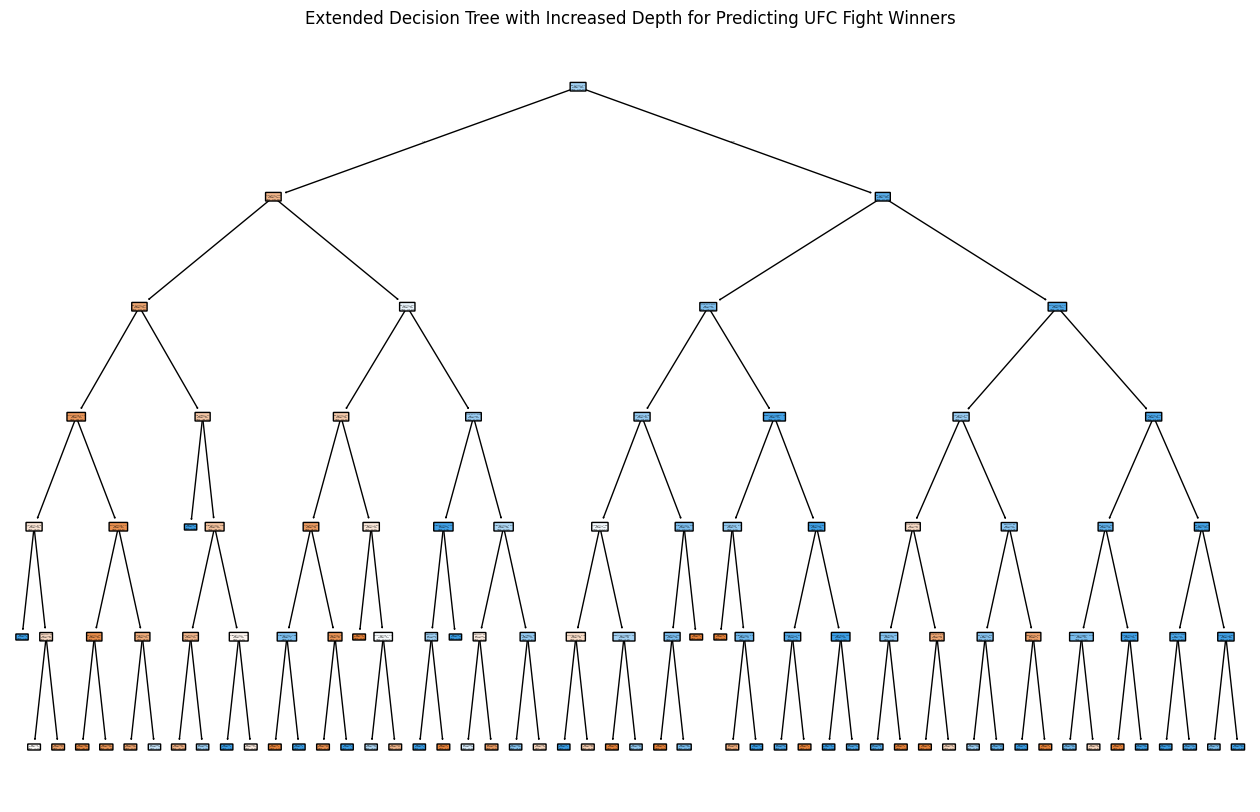

In [47]:

# Preprocess additional features and encode categorical variables if necessary
ufc_data_cleaned['weight_class_encoded'] = label_encoder.fit_transform(ufc_data_cleaned['weight_class'])
ufc_data_cleaned['method_encoded'] = label_encoder.fit_transform(ufc_data_cleaned['method'])
ufc_data_cleaned['gender_encoded'] = label_encoder.fit_transform(ufc_data_cleaned['gender'])

# Extended feature set including suggested additional features
features_extended = [
    'reach_diff', 'age_diff', 'sig_str_diff', 'td_acc_diff', 'total_rounds',
    'weight_class_encoded', 'is_title_bout', 'method_encoded', 'gender_encoded',
    'SLpM_total_diff', 'SApM_total_diff', 'td_avg_diff', 'height_diff'
]

X_extended = ufc_data_cleaned[features_extended]
y_extended = ufc_data_cleaned['red_wins']

# Splitting data into training and testing sets
X_train_extended, X_test_extended, y_train_extended, y_test_extended = train_test_split(X_extended, y_extended, test_size=0.3, random_state=42)

# Increase the maximum depth of the decision tree to allow for more splitting and use of additional features
clf_extended = DecisionTreeClassifier(max_depth=6, random_state=42)  # Increased depth
clf_extended.fit(X_train_extended, y_train_extended)

# Plotting the decision tree with increased depth
plt.figure(figsize=(16, 10))
plot_tree(clf_extended, feature_names=features_extended, class_names=['Blue Win', 'Red Win'], filled=True, rounded=True)
plt.title("Extended Decision Tree with Increased Depth for Predicting UFC Fight Winners")
plt.show()



In [49]:


# Make predictions on the test set
y_pred_extended = clf_extended.predict(X_test_extended)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_extended, y_pred_extended)
precision = precision_score(y_test_extended, y_pred_extended)
recall = recall_score(y_test_extended, y_pred_extended)
f1 = f1_score(y_test_extended, y_pred_extended)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.82
Precision: 0.86
Recall: 0.88
F1 Score: 0.87


In [56]:
# Creating separate label encoders for each category column
weight_class_encoder = LabelEncoder().fit(ufc_data_cleaned['weight_class'].unique())
method_encoder = LabelEncoder().fit(ufc_data_cleaned['method'].unique())
gender_encoder = LabelEncoder().fit(ufc_data_cleaned['gender'].unique())

# Create data for the hypothetical fight with Khamzat in the red corner and Robert in the blue corner
fight_data_khamzat_robert = pd.DataFrame({
    'reach_diff': [khamzat_data['r_reach'] - robert_data['b_reach']],
    'age_diff': [khamzat_data['r_age'] - robert_data['b_age']],
    'sig_str_diff': [khamzat_data['r_SLpM_total'] - robert_data['b_SLpM_total']],
    'td_acc_diff': [khamzat_data['r_td_acc_total'] - robert_data['b_td_acc_total']],
    'total_rounds': [3],  # Assuming a main event or title fight
    'weight_class_encoded': [weight_class_encoder.transform([khamzat_data['weight_class']])[0]],
    'is_title_bout': [0],  # Assuming not a title fight for this prediction
    'method_encoded': [method_encoder.transform([khamzat_data['method']])[0]],
    'gender_encoded': [gender_encoder.transform([khamzat_data['gender']])[0]],
    'SLpM_total_diff': [khamzat_data['r_SLpM_total'] - robert_data['b_SLpM_total']],
    'SApM_total_diff': [khamzat_data['r_SApM_total'] - robert_data['b_SApM_total']],
    'td_avg_diff': [khamzat_data['r_td_avg'] - robert_data['b_td_avg']],
    'height_diff': [khamzat_data['r_height'] - robert_data['b_height']]
})

# Predict the result for the fight
prediction_khamzat_robert = clf_extended.predict(fight_data_khamzat_robert)

# Determine the predicted winner
predicted_winner_color_khamzat_robert = 'Red' if prediction_khamzat_robert[0] == 1 else 'Blue'
predicted_winner_fighter_khamzat_robert = 'Khamzat Chimaev' if prediction_khamzat_robert[0] == 1 else 'Robert Whittaker'

print(f"Prediction for Hypothetical Fight (Khamzat vs Robert): Winner — {predicted_winner_color_khamzat_robert} ({predicted_winner_fighter_khamzat_robert}).")



Prediction for Hypothetical Fight (Khamzat vs Robert): Winner — Blue (Robert Whittaker).


In [57]:
# Extract data for Ilia Topuria and Max Holloway from the DataFrame if available
ilia_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Ilia Topuria') | 
                             (ufc_data_cleaned['b_fighter'] == 'Ilia Topuria')].iloc[0]

max_data = ufc_data_cleaned[(ufc_data_cleaned['r_fighter'] == 'Max Holloway') | 
                            (ufc_data_cleaned['b_fighter'] == 'Max Holloway')].iloc[0]

# Create data for the hypothetical fight with Ilia in the red corner and Max in the blue corner
fight_data_ilia_max = pd.DataFrame({
    'reach_diff': [ilia_data['r_reach'] - max_data['b_reach']],
    'age_diff': [ilia_data['r_age'] - max_data['b_age']],
    'sig_str_diff': [ilia_data['r_SLpM_total'] - max_data['b_SLpM_total']],
    'td_acc_diff': [ilia_data['r_td_acc_total'] - max_data['b_td_acc_total']],
    'total_rounds': [5],  # Assuming a main event or title fight
    'weight_class_encoded': [weight_class_encoder.transform([ilia_data['weight_class']])[0]],
    'is_title_bout': [0],  # Assuming not a title fight for this prediction
    'method_encoded': [method_encoder.transform([ilia_data['method']])[0]],
    'gender_encoded': [gender_encoder.transform([ilia_data['gender']])[0]],
    'SLpM_total_diff': [ilia_data['r_SLpM_total'] - max_data['b_SLpM_total']],
    'SApM_total_diff': [ilia_data['r_SApM_total'] - max_data['b_SApM_total']],
    'td_avg_diff': [ilia_data['r_td_avg'] - max_data['b_td_avg']],
    'height_diff': [ilia_data['r_height'] - max_data['b_height']]
})

# Predict the result for the fight
prediction_ilia_max = clf_extended.predict(fight_data_ilia_max)

# Determine the predicted winner
predicted_winner_color_ilia_max = 'Red' if prediction_ilia_max[0] == 1 else 'Blue'
predicted_winner_fighter_ilia_max = 'Ilia Topuria' if prediction_ilia_max[0] == 1 else 'Max Holloway'

print(f"Prediction for Hypothetical Fight (Ilia vs Max): Winner — {predicted_winner_color_ilia_max} ({predicted_winner_fighter_ilia_max}).")



Prediction for Hypothetical Fight (Ilia vs Max): Winner — Red (Ilia Topuria).


In [60]:
# Create data for the swapped fight with Stipe in the red corner and Jon in the blue corner
fight_data_stipe_jon_swapped = pd.DataFrame({
    'reach_diff': [stipe_data['r_reach'] - jon_data['b_reach']],
    'age_diff': [stipe_data['r_age'] - jon_data['b_age']],
    'sig_str_diff': [stipe_data['r_SLpM_total'] - jon_data['b_SLpM_total']],
    'td_acc_diff': [stipe_data['r_td_acc_total'] - jon_data['b_td_acc_total']],
    'total_rounds': [5],  # Assuming a main event or title fight
    'weight_class_encoded': [weight_class_encoder.transform([stipe_data['weight_class']])[0]],
    'is_title_bout': [0],  # Assuming not a title fight for this prediction
    'method_encoded': [method_encoder.transform([stipe_data['method']])[0]],
    'gender_encoded': [gender_encoder.transform([stipe_data['gender']])[0]],
    'SLpM_total_diff': [stipe_data['r_SLpM_total'] - jon_data['b_SLpM_total']],
    'SApM_total_diff': [stipe_data['r_SApM_total'] - jon_data['b_SApM_total']],
    'td_avg_diff': [stipe_data['r_td_avg'] - jon_data['b_td_avg']],
    'height_diff': [stipe_data['r_height'] - jon_data['b_height']]
})

# Predict the result for the swapped fight
prediction_stipe_jon_swapped = clf_extended.predict(fight_data_stipe_jon_swapped)

# Determine the predicted winner
predicted_winner_color_stipe_jon_swapped = 'Red' if prediction_stipe_jon_swapped[0] == 1 else 'Blue'
predicted_winner_fighter_stipe_jon_swapped = 'Stipe Miocic' if prediction_stipe_jon_swapped[0] == 1 else 'Jon Jones'

print(f"Prediction for Hypothetical Fight with Swapped Positions (Stipe vs Jon): Winner — {predicted_winner_color_stipe_jon_swapped} ({predicted_winner_fighter_stipe_jon_swapped}).")



Prediction for Hypothetical Fight with Swapped Positions (Stipe vs Jon): Winner — Red (Stipe Miocic).


In [14]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
importances = clf.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance}")


Feature: is_title_bout, Importance: 0.0003693417711154691
Feature: finish_round, Importance: 0.0029798451719334567
Feature: total_rounds, Importance: 0.0012369560271932934
Feature: time_sec, Importance: 0.008364833109096772
Feature: r_kd, Importance: 0.01839633083449277
Feature: r_sig_str, Importance: 0.009433365852969448
Feature: r_sig_str_att, Importance: 0.007329752293931065
Feature: r_sig_str_acc, Importance: 0.010143395259099167
Feature: r_str, Importance: 0.012941419240415229
Feature: r_str_att, Importance: 0.008697427600795688
Feature: r_str_acc, Importance: 0.011330803215214676
Feature: r_td, Importance: 0.004598006591178355
Feature: r_td_att, Importance: 0.003769944793926611
Feature: r_td_acc, Importance: 0.00867976441259808
Feature: r_sub_att, Importance: 0.012312404266221627
Feature: r_rev, Importance: 0.000778263917417005
Feature: r_ctrl_sec, Importance: 0.01773909463004805
Feature: r_wins_total, Importance: 0.0076830432678468025
Feature: r_losses_total, Importance: 0.00522

In [17]:
# Обучение с class_weight='balanced'
clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Предсказание на новых данных
prediction_original = clf.predict(fight_features_filled)
prediction_swapped = clf.predict(fight_features_swapped)

print(f"Prediction with Khabib in Red Corner: {le.inverse_transform(prediction_original)}")
print(f"Prediction with Dustin in Red Corner: {le.inverse_transform(prediction_swapped)}")


Prediction with Khabib in Red Corner: ['Red']
Prediction with Dustin in Red Corner: ['Red']
